## Final Project Submission
* Student name: Pupity Mwendwa
* Student pace: Part time
* Instructor name:Samuel Karu

## SyriaTel Customer Churn Prediction

## Project Task
Build a binary classification model to predict whether a SyriaTel customer will churn (i.e stop doing business) in the near future.

## Business Understanding

The telecom provider SyriaTel wants to minimize revenue loss from client attrition. SyriaTel can enhance customer satisfaction and retain consumers by implementing focused retention methods aimed at identifying high-risk clients.

## Business Objectives

1.  Determine which customers are at danger of churning: Make an accurate guess as to which ones are most likely to cut off service.

2.  Put focused retention methods into practice: Create specialized marketing strategies to speak to the unique requirements of at-risk clients and persuade them to stick with SyriaTel.

3.  Boost client contentment Improve the whole customer experience to lower attrition and increase steadfast loyalty.

4.  Efficient resource allocation can be achieved by concentrating retention efforts on customers who are most likely to leave.

## Data Mining Objectives

Create a categorization model using pertinent customer qualities and past data that can reliably forecast client attrition. It should be possible for the model to distinguish between clients who are likely to churn and those who are not.

## Data Loading And Understanding

This project makes use of the SyriaTel dataset, which can be found in SyriaTel Data.csv. The following columns and their meanings are as follows: 

 1. State: this usually indicates the customer's geographic location
 2. Account Length: this indicates the duration that the customer has held their account
 3. Area Code: this is the customer's phone number
 4. Phone Number: this is typically a unique identifier for customers
 5. International Plan: this is a binary variable that indicates whether the customer has an international calling plan
 6. Voice Mail Plan: This is a binary variable that indicates whether the customer has a voicemail plan
 7. Number Vmail Messages: this is the number of voicemail messages that the customer has received 
 8. Total Day Minutes, Total Day Calls, Total Day Charge: These columns reflect the customer's usage during the day
 9. Total Eve Minutes, Total Eve Calls, Total Eve Charge: These columns reflect the customer's usage in the evening
 10. Total Night Minutes, Total Night Calls, Total Night Charge: These columns reflect the customer's usage at night
 11. Total Intl Minutes, Total Intl Calls, Total Intl Charge: These columns correspond to the customer's usage abroad
 12. Customer Service Calls: The quantity of calls made by the customer
 13. Churn: This is the target variable that indicates whether a customer has churned (1) or not (0); all other columns are potential features for modeling.

In [6]:
#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv(r'C:\Users\USER\Desktop\dsc-phase3-projects\dsc-phase3-projects\bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df.shape

(3333, 21)

In [10]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [11]:
df.describe() 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
# Understand the information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [13]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [14]:
df.select_dtypes('object')

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


In [15]:
df.select_dtypes('int64')

,account length,area code,number vmail messages,total day calls,total eve calls,total night calls,total intl calls,customer service calls
0,128,415,25,110,99,91,3,1
1,107,415,26,123,103,103,3,1
2,137,415,0,114,110,104,5,0
3,84,408,0,71,88,89,7,2
4,75,415,0,113,122,121,3,3
...,...,...,...,...,...,...,...,...
3328,192,415,36,77,126,83,6,2
3329,68,415,0,57,55,123,4,3
3330,28,510,0,109,58,91,6,2
3331,184,510,0,105,84,137,10,2


In [16]:
df.select_dtypes('float64')

,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge
0,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70
1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70
2,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29
3,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78
4,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73
...,...,...,...,...,...,...,...,...
3328,156.2,26.55,215.5,18.32,279.1,12.56,9.9,2.67
3329,231.1,39.29,153.4,13.04,191.3,8.61,9.6,2.59
3330,180.8,30.74,288.8,24.55,191.9,8.64,14.1,3.81
3331,213.8,36.35,159.6,13.57,139.2,6.26,5.0,1.35


In [17]:
df.select_dtypes('bool')

,churn
0,False
1,False
2,False
3,False
4,False
...,...
3328,False
3329,False
3330,False
3331,False


## Finding 1: Converting data type

After reviewing the data, I discovered a significant problem with the data type pertaining to the 'area code' column. Despite being represented in the dataset as an integer, the values it includes are simply labels or placeholders rather than actual values with mathematical significance. In order to mitigate any potential disruptions to my predictive modeling procedure, I have made the conversion of this column to a string data type. I may be certain that the 'region code' column is regarded as a categorical variable devoid of numerical meaning by taking this action. This conversion helps to eliminate any misunderstanding of the "area code" as a quantitative attribute, which is especially important when the predictive model depends on numerical inputs.

In [18]:
# Convert the 'area code' column to an object (string) column
df['area code'] = df['area code'].astype(str)
df.select_dtypes('object')

,state,area code,phone number,international plan,voice mail plan
0,KS,415,382-4657,no,yes
1,OH,415,371-7191,no,yes
2,NJ,415,358-1921,no,no
3,OH,408,375-9999,yes,no
4,OK,415,330-6626,yes,no
...,...,...,...,...,...
3328,AZ,415,414-4276,no,yes
3329,WV,415,370-3271,no,no
3330,RI,510,328-8230,no,no
3331,CT,510,364-6381,yes,no


In [19]:
# Check for the unique values
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [20]:
df.duplicated().sum()

0

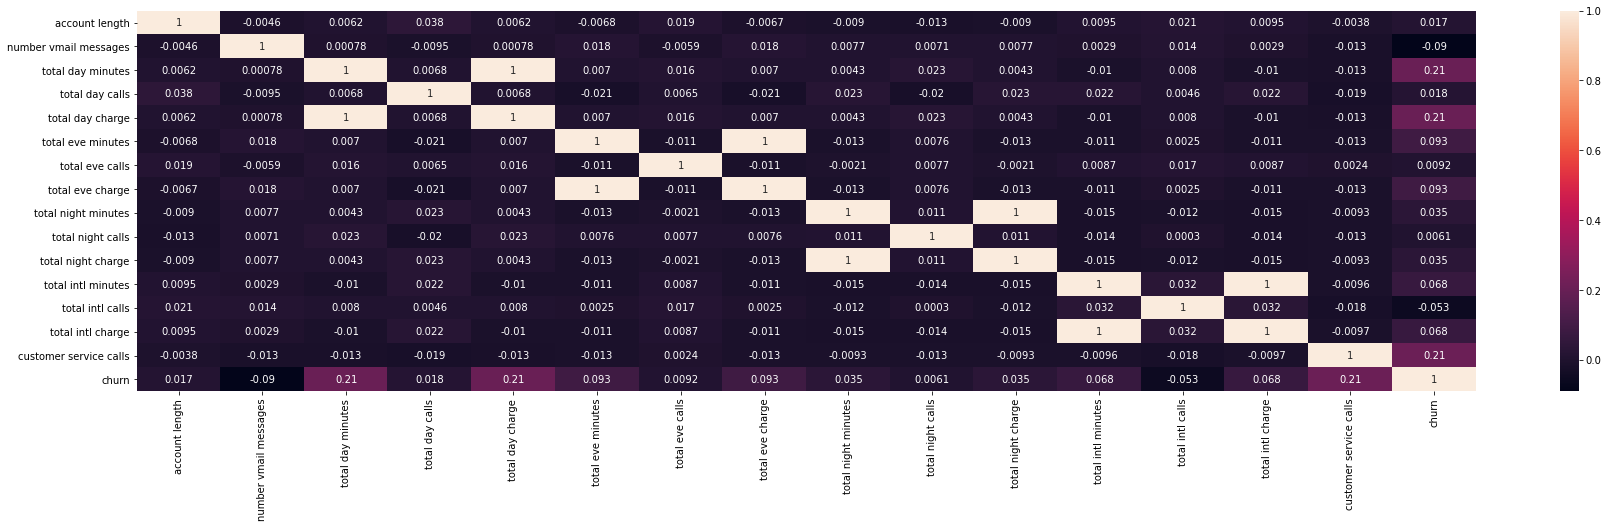

In [21]:
# Plot a heatmap to check how the columns are correlated
plt.rcParams['figure.figsize'] = (30, 7)  
sns.heatmap(df.corr(), annot=True)
plt.show()


## Finding 2: High correlation - Multicollinearity

A closer look at the data's heatmap representation showed  that a number of the columns have strong correlations with one another. This finding suggests that our dataset's independent variables are closely connected, a phenomenon known as multicollinearity. In my modeling, multicollinearity can make it difficult to identify the distinct influence of each independent variable on the dependent variable. This problem may lead to overfitting, especially when using Logistic Regression, which is susceptible to multicollinearity.

It will be essential to take particular actions to handle multicollinearity in my modeling process in order to solve this risk. To lessen the negative consequences of multicollinearity, these actions may entail using strategies like feature selection, dimensionality reduction, or regularization. By doing this, I can make sure that my models offer accurate insights into the relationships between my independent and dependent variables and improve their interpretability and reliability.
